# DIABOLO


#  LECTURE DES DONNES

In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
#from  pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets # datasets classiques
from sklearn import preprocessing # normalisation les données
from sklearn import decomposition # PCA et NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA

#vous pouvez modifier cette option à votre guise
pd.options.display.max_rows = 10

                   
Location_csv = 'd:\diabolo_1.csv'
 xnames = ['ALLURE'
        , 'CO_DISTANCE',
              'CO_PRIX',
              'HIPPO',
              'IDCOURSE',
              'IDPARTCIPANT',
              'PAR_AGE',
              'PAR_ARRIVE',
              'PAR_CARRIERE',
              'PAR_CARRIERE_Q',
              'PAR_CLASSE_AGE',
              'PAR_COTEDER',
              'PAR_ENT_ECART_GAGNANT',
              'PAR_ENT_RAPPORT_GAGNANT_M',
              'PAR_ENT_REU_PLACE',
              'PAR_ENT_REUSSITE_GAGNE',
              'PAR_ENT_VICTOIRE',
              'PAR_GAIN',
              'pAR_JOC_ECART_GAGNANT',
              'PAR_JOC_ECART_PLACE',
              'PAR_JOC_NB_COURSE',
              'PAR_JOC_PLACE_3P',
              'pAR_JOC_RAPPORT_GAGNANT_M',
              'PAR_JOC_REU_PLACE',
              'pAR_JOC_REUSSITE_GAGNE',
              'pAR_JOC_VICTOIRE',
              'PAR_NP',
              'PAR_NUM',
              'PAR_PLACE',
              'PAR_PLACE_Q',
              'PAR_REUSSITE_3P',
              'PAR_REUSSITE_GAGNE',
              'PAR_REUSSITE_QUINTE',
              'PAR_RUESSITE_PLACE',
              'autostart',
              'cendre',
              'grande_piste',
              'Point',
              'Nb_partant', 'musique', 'FIN_ligne']


df=pd.read_csv (Location_csv, sep=';',names=xnames,skipinitialspace=True,encoding='Latin-1')

df=df.groupby('ALLURE')     
df=df.get_group(1) 

#Suppression de la collone TROT
df.drop(["ALLURE"], axis=1, inplace=True)

#Suppression de la collone TROT
df.drop(["FIN_ligne"], axis=1, inplace=True)

#Suppression de la collone TROT
df.drop(["IDPARTCIPANT"], axis=1, inplace=True)

#Suppression de la collone TROT
df.drop(["PAR_NP"], axis=1, inplace=True)


#Suppression de la collone TROT
df.drop(["cendre"], axis=1, inplace=True)

#Suppression de la collone TROT
df.drop(["IDCOURSE"], axis=1, inplace=True)

#Suppression de la collone TROT
#df.drop(["PAR_NUM"], axis=1, inplace=True)

#Suppression de la collone TROT
##df.drop(["autostart"], axis=1, inplace=True)



#Suppression de la collone TROT
df.drop(["grande_piste"], axis=1, inplace=True)

#xnames=['CO_DISTANCE','CO_NB','CO_PRIX','HIPPO','IDCOURSE','PAR_age','PAR_ARRIVE',
#'PAR_CARRIERE','PAR_CARRIERE_Q','PAR_CLASSE_AGE','PAR_CORDE','PAR_COTEDER','PAR_ENT_ECART_GAGNANT','PAR_ENT_RAPPORT_GAGNANT_M',
#'PAR_ENT_RAPPORT_GANGANT','PAR_ENT_REU_PLACE','PAR_ENT_REUSSITE_GAGNE','PAR_ENT_VICTOIRE','PAR_GAIN','pAR_JOC_ECART_GAGNANT',
#'PAR_JOC_ECART_PLACE','PAR_JOC_NB_COURSE','PAR_JOC_PLACE_3P','pAR_JOC_RAPPORT_GAGNANT_M','PAR_JOC_REU_PLACE','pAR_JOC_REUSSITE_GAGNE',
#'pAR_JOC_VICTOIRE','PAR_NP','PAR_PLACE','PAR_PLACE_Q','PAR_REUSSITE_3P','PAR_REUSSITE_GAGNE','PAR_REUSSITE_QUINTE','PAR_RUESSITE_PLACE','autostart','cendre','grande_piste','sable_fibre','dirt']
   
#Transformer une colonne en un index dans un dataframe
#df = df.set_index('IDPARTCIPANT')

#affichage des premiere lignes du jeu de données
df.head()



IndentationError: unexpected indent (<ipython-input-1-4c69f057238e>, line 26)

La normalisation des ensembles de données est une exigence courante pour de nombreux estimateurs d'apprentissage automatique mis en œuvre dans scikit-learn; 
ils peuvent se comporter mal 
si les caractéristiques individuelles ne ressemblent pas plus ou moins à des données standard normalement distribuées: gaussiennes avec une moyenne nulle et une variance unitaire .

# EXPLORATIN DES DONNEES

# CORRELATION DES DONNEES

In [94]:
# trvail sur les courses de trot (allure=1)
# dimensions

print(df.shape) # lignes = observations
print(df.dtypes) # lignes = observations


(174307, 29)
CO_DISTANCE              int64
CO_PRIX                  int64
PAR_ARRIVE               int64
PAR_CARRIERE             int64
PAR_CARRIERE_Q           int64
                        ...   
PAR_REUSSITE_3P        float64
PAR_REUSSITE_GAGNE     float64
PAR_REUSSITE_QUINTE    float64
PAR_RUESSITE_PLACE     float64
autostart                int64
Length: 29, dtype: object


L’analyse univariée permet d’explorer une seule feature à la fois. 
Cette analyse se base sur les statistiques descriptives.
Ces dernières permettent de tirer des indications concises sur une feature donnée.
Parmi ces indicateurs, on retrouve la moyenne, la médiane ainsi que les mesures de dispersion de données.

In [95]:
#enumeration des colonnes
df.columns
p_reussite_3p= df['PAR_REUSSITE_3P']
    

    
    

Petite exploration dur la variable PAR_REUSSITE_3P

VARIANCE : 
indique de quelle manière la série de données d’une feature se disperse autour de la moyenne. Une variance élevée indique que les valeurs sont très écartées les unes des autres et vice versa.

écart type : 
L’écart type est aussi une mesure de dispersion des données. Il est tout simplement la racine carrée de la variance. On utilise souvent l’écart type que la variance pour mieux appréhender le degré de dispersion des données.

In [96]:
def explo_variable(dataset, svariable):

     # On calcule le quantile 0,25 qui est le quartile Q1
    mediane = np.median(dataset)
    print ("La mediane              "+svariable+"    : ", round(mediane, 2))

    maxx = np.max(dataset)
    print ("Le max              "+svariable+"    : ", round(maxx, 2))
    
    minn = np.min(dataset)
    print ("Le min              "+svariable+"    : ", round(minn, 2))
    
    
    moy = np.mean(dataset)
    print ("La moyenne               "+svariable+"   : ", round(moy, 2))

    variance = np.var(dataset)
    print ("La variance est          "+svariable+"   : ", round(variance, 2))
    
    ecartType = np.std(dataset)
    print ("Le ecart type            "+svariable+"   : ", round(ecartType, 2))
     
    print("")      
    
    print(dataset.describe())
    
    print("")    
    
 
    
    
    
    

In [97]:
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline


In [98]:
#gagnant
#sélection des chevaux dans les 5 premiers


df_gagnant = df
# les lignes sans GAIN sont éliminées
df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0]
#les lignes sans arrivée n'apporte rien
df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0]
# trvail sur les courses de trot (allure=1)
print(df_gagnant.shape)


(149442, 29)


In [99]:



COLUM=df_gagnant.columns
COLUM



Index(['CO_DISTANCE', 'CO_PRIX', 'PAR_ARRIVE', 'PAR_CARRIERE',
       'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE', 'PAR_COTEDER',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE',
       'autostart'],
      dtype='object')

In [100]:
explo_variable(df_gagnant['PAR_REUSSITE_3P'],"PAR_REUSSITE_3P")



                     



La mediane              PAR_REUSSITE_3P    :  0.27
Le max              PAR_REUSSITE_3P    :  1.0
Le min              PAR_REUSSITE_3P    :  0.0
La moyenne               PAR_REUSSITE_3P   :  0.29
La variance est          PAR_REUSSITE_3P   :  0.02
Le ecart type            PAR_REUSSITE_3P   :  0.15

count    149442.000000
mean          0.287229
std           0.148477
min           0.000000
25%           0.190476
50%           0.266667
75%           0.361111
max           1.000000
Name: PAR_REUSSITE_3P, dtype: float64



# MATRICE DE CORRELATION

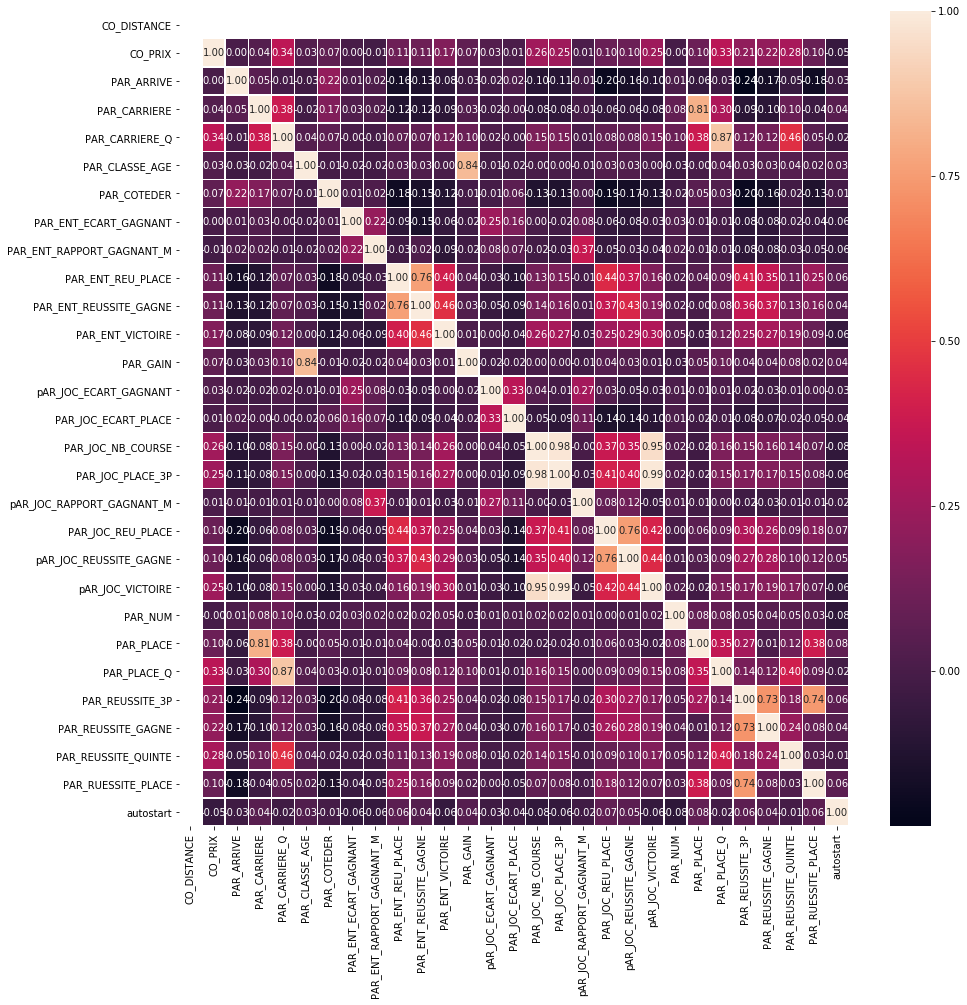

In [101]:
#Enfin, quelque chose de vraiment cool que vous pouvez mettre 

#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=.4, ax=ax)

# Quelques informations sur les variables

# Selection des classifications a determiner

In [102]:
pd.options.mode.chained_assignment = None


df_gagnant['SELECTION'] = (df_gagnant.PAR_ARRIVE<=4).astype(int)
#Suppression de la colonne PAR_ARRIVE

df_gagnant

# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
#sns.pairplot(df_gagnant, x_vars=['PAR_JOC_PLACE_3P', 'pAR_JOC_VICTOIRE'], y_vars='SELECTION', size=7, aspect=0.7, kind='reg')

,CO_DISTANCE,CO_PRIX,PAR_ARRIVE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,...,pAR_JOC_VICTOIRE,PAR_NUM,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,autostart,SELECTION
0,0,90000,99,61,14,32482,36,5,11.40,0.27,...,90,17,12,6,0.311475,0.114754,0.016393,0.196721,1,0
1,0,90000,99,62,5,15121,255,0,0.00,0.00,...,0,16,16,1,0.451613,0.193548,0.000000,0.258065,1,0
2,0,90000,99,38,1,12749,255,7,10.10,0.12,...,3,15,6,0,0.157895,0.000000,0.000000,0.157895,1,0
3,0,90000,99,70,2,26888,255,1,4.73,0.26,...,0,14,13,1,0.500000,0.314286,0.000000,0.185714,1,0
4,0,90000,99,33,1,31770,19,7,4.91,0.27,...,189,13,6,0,0.424242,0.242424,0.000000,0.181818,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174274,0,3500,99,35,0,1684,61,7,7.55,0.23,...,0,1,4,0,0.142857,0.028571,0.000000,0.114286,1,0
174285,0,3500,3,37,0,568,5,0,8.85,0.50,...,1,10,6,0,0.324324,0.162162,0.000000,0.162162,1,1
174297,0,3500,99,24,0,288,28,6,18.42,0.21,...,0,10,3,0,0.125000,0.000000,0.000000,0.125000,1,0
174303,0,3500,99,17,0,35,22,5,8.36,0.30,...,0,4,2,0,0.176471,0.058824,0.000000,0.117647,1,0


In [103]:
df_gagnant.drop(["PAR_ARRIVE"], axis=1, inplace=True)

df_gagnant.groupby('SELECTION').mean()

,CO_DISTANCE,CO_PRIX,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,...,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_NUM,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,autostart
SELECTION,,,,,,,,,,,,,,,,,,,,,
0,0.0,24709.407897,46.228220,0.993490,16858.225285,38.215492,10.531144,9.608849,0.197205,0.060674,...,0.056315,17.972054,7.836296,7.860166,0.252354,0.263403,0.093881,0.000870,0.169521,0.300075
1,0.0,24537.534912,42.694905,1.044877,26190.003958,16.238171,9.984397,9.157157,0.240662,0.080268,...,0.078947,28.393285,7.780332,8.631432,0.314301,0.345346,0.134116,0.001736,0.211230,0.326452


# NORMALISATION

In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.RobustScaler()

scaled_df=scaler.fit_transform ( df_gagnant ) 
scaled_df


array([[ 0.        ,  5.38461538,  0.55      , ...,  0.21969141,
         1.        ,  0.        ],
       [ 0.        ,  5.38461538,  0.575     , ...,  0.76210266,
         1.        ,  0.        ],
       [ 0.        ,  5.38461538, -0.025     , ..., -0.12361289,
         1.        ,  0.        ],
       ..., 
       [ 0.        , -1.26923077, -0.375     , ..., -0.41447456,
         1.        ,  0.        ],
       [ 0.        , -1.26923077, -0.55      , ..., -0.47949069,
         1.        ,  0.        ],
       [ 0.        , -1.26923077, -0.75      , ..., -1.51974004,
         1.        ,  1.        ]])

In [118]:
# Tranformation en matrice NUMPY - seul reconnu par SCIKIT LEARN

#data = df_gagnant.as_matrix() 

# X est la matrice des variables explicatives
X = scaled_df[:,0:26]

# y vecteur de a variable à predire
y = scaled_df[:,27]
y


array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

 # STANDARDISATION

In [119]:
# utilisation du module model_selection de scikit-learn (sklearn)
from sklearn import model_selection


In [120]:
# subdivision des données 
# eche test = 70000
X_app, X_test, y_app, y_test = model_selection.train_test_split(X,y,test_size=65000, random_state=0)
print(X_app.shape, X_test.shape, y_app.shape, y_test.shape)


(84442, 26) (65000, 26) (84442,) (65000,)


In [121]:
# a partir du module linear_model du pacxkage sklearn
# importer la classe LogisticRegression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# execution de l'instance sur les données d'apprentissage
modele=lr.fit(X_app, y_app)




In [122]:
# Les sorties sonit tres pauvres à la difference des logiciels de STAT
#Les coefficients ...
print(modele.coef_, modele.intercept_)


[[ 0.         -0.05355064 -0.01841442 -0.0181608  -0.00307114  0.00987862
  -0.08428545 -0.07540671  0.06441909  0.02640051 -0.10585945  0.01252754
   0.01205395 -0.03189933 -0.2717084   0.25624133 -0.01672455  0.15112835
   0.1320705  -0.12848633 -0.29775045  0.2207793   0.00375214  0.04694357
   0.05277371  1.28744204]] [-0.70861828]


In [123]:
# prediction sur l'echantillon de test
y_pred=modele.predict(X_test)

# importation de metrics -  utilisé pour les mesures de performances
from sklearn import metrics
# matrice de confusion
#confrontation entre Y obs. sur l'ech test et la prediction
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)
# c est la matrice de confusion
# ligne : observé
# colonne : prediction


[[44014   861]
 [18111  2014]]


In [124]:
#Taux de succes
acc=metrics.accuracy_score(y_test,y_pred)
print(acc)


0.708123076923


In [125]:
#Taux d erreur
err=1.0 - acc
print(err)


0.291876923077


# VALIDATION CROISEE

In [126]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# execution de l'instance sur les données d'apprentissage
# execution de l'instande sur la totalité des données (X,y)
modele_all=lr.fit(X, y)

print(modele_all.coef_, modele_all.intercept_)





[[ 0.         -0.05250593 -0.00756087 -0.02054837 -0.00281779  0.00774865
  -0.08025853 -0.07497051  0.07141609  0.02917479 -0.10852046  0.01176516
   0.00877872 -0.03276973 -0.29034197  0.27026316 -0.01738655  0.16491045
   0.103362   -0.13035653 -0.2938448   0.22387625  0.00681768  0.0451416
   0.05237318  1.43890342]] [-0.69605623]


In [127]:
# evaluation du module cross validation
from sklearn import cross_validation

#evaluation en validation croisée : 10 cross validation

succes = cross_validation.cross_val_score(lr,X,y,cv=10, scoring='accuracy')
print(succes)
print(succes.mean())


[ 0.71482101  0.70792907  0.70289079  0.70650428  0.70188704  0.70991702
  0.71493576  0.71031852  0.71058619  0.70764186]
0.708743156116


# SCORING

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
#creation d'une instance de la classe
lr=LogisticRegression()


In [130]:
#modelisation sur les données d'apprentissage
lr=LogisticRegression()
modele = lr.fit(X_app,y_app)


In [131]:
#calcul des probas d'affectations sur ech test
probas=lr.predict_proba(X_test)
probas


array([[ 0.7461342 ,  0.2538658 ],
       [ 0.68162777,  0.31837223],
       [ 0.62066845,  0.37933155],
       ..., 
       [ 0.71062439,  0.28937561],
       [ 0.68806775,  0.31193225],
       [ 0.69268739,  0.30731261]])

In [132]:
#score de 'presence'
score=probas[:,1]
score

array([ 0.2538658 ,  0.31837223,  0.37933155, ...,  0.28937561,
        0.31193225,  0.30731261])

In [133]:
pos=pd.get_dummies(y_test).as_matrix()
#CLASSES D'APPARTENANCE NEGATIVE POSITIVE
pos

array([[1, 0],
       [0, 1],
       [0, 1],
       ..., 
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [134]:
# on ne recupere que la 2e collone
pos = pos[:,1]
pos


array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [135]:
#nombre de total positif
import numpy
npos=numpy.sum(pos)
npos

20125

In [136]:
#index pour tri selon le score croissant
index=numpy.argsort(score)
index


array([61982, 22532,  8279, ..., 25821, 27150, 55911], dtype=int64)

In [137]:
#inverser pour score decroissant
index = index[::-1]
index

array([55911, 27150, 25821, ...,  8279, 22532, 61982], dtype=int64)

In [138]:
#tri des individus
sort_pos=pos[index]
sort_pos


array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [139]:
#somme cumulée
cpos=numpy.cumsum(sort_pos)
cpos

array([    1,     2,     2, ..., 20125, 20125, 20125], dtype=uint32)

In [140]:
rappel=cpos/npos
rappel

array([  4.96894410e-05,   9.93788820e-05,   9.93788820e-05, ...,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00])

In [141]:
#nb. obs ech test
n=y_test.shape[0]
n


65000

In [142]:
# taille de cible - sequence de valeurs de 1 à  avec un pas de 1
taille=numpy.arange(start=1, stop=65001, step=1)
taille

array([    1,     2,     3, ..., 64998, 64999, 65000])

In [143]:
#proportion
taille=taille/n
taille

array([  1.53846154e-05,   3.07692308e-05,   4.61538462e-05, ...,
         9.99969231e-01,   9.99984615e-01,   1.00000000e+00])

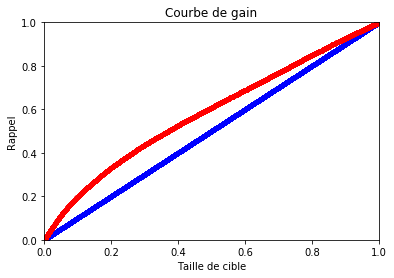

In [144]:
#graphique avec matplotlib


plt.title('Courbe de gain')
plt.xlabel('Taille de cible')
plt.ylabel('Rappel')

#limites en abscisse et ordonnée
plt.xlim(0,1)
plt.ylim(0,1)

#astuce pour tracer la diagonale
plt.scatter(taille, taille, marker='.', color='blue')

#insertion du couple (taille, rappel)
plt.scatter(taille, rappel, marker='.', color='red')

#affichage
plt.show()



# dependance des algorithmes d apprentissage aux parametres

# Objectif : la sélection de variables - la recherche de
modèles parcimonieux - présente plusieurs
avantages : interprétation, déploiement (moins de
var. à renseigner), performances en généralisation
(ou du moins maintien des performances).
Méthode : Nous implémentons la méthode RFE de
scikit-learn : elle élimine au fur et à mesure les
coefficients les plus faibles en valeur absolue
(étrange : les variables ne sont pas toujours à la
même échelle ??? une standardisation des
variables me paraît nécessaire), et s’arrête quand
on arrive à la moitié ou à un nombre spécifié de
variables

In [145]:
#import la classe LogisticRegression
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()




In [146]:
 #algo de selection de var.
from sklearn.feature_selection import RFE
selecteur=RFE(estimator=lr)


In [147]:
#lancer la recherche
sol=selecteur.fit(X_app, y_app)

#nombe de var selectionnees
print(sol.n_features_)


13


In [148]:
#liste des variables selectionnées
print(sol.support_)

[False  True False False False False  True  True  True False  True False
 False False  True  True False  True  True  True  True  True False  True
 False False]


In [149]:
#odre de suppression
print(sol.ranking_)

[14  1  3  8 13 10  1  1  1  5  1 11  9  4  1  1  6  1  1  1  1  1 12  1  2
  7]


In [150]:
#réduction de la base d'app. aux var. sélectionnées
#en utilisant le filtre booléen sol.support_
X_new_app = X_app[:,sol.support_]


In [151]:
print(X_new_app.shape) # (468, 4) 4 variables restantes

(84442, 13)


In [152]:
#construction du modèle sur les explicatives sélectionnées
modele_sel = lr.fit(X_new_app,y_app)

In [153]:
#réduction de la base test aux mêmes variables
X_new_test = X_test[:,sol.support_]


In [154]:
print(X_new_test.shape) # (300, 4)

(65000, 13)


In [155]:
#prédiction du modèle réduit sur l’éch. test
y_pred_sel = modele_sel.predict(X_new_test)
#évaluation
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_sel)) # resukt, target

0.707430769231


In [156]:
#calcul des probas d'affectations sur ech test
probas=lr.predict_proba(X_new_test)
probas


array([[ 0.74991334,  0.25008666],
       [ 0.69510675,  0.30489325],
       [ 0.56361645,  0.43638355],
       ..., 
       [ 0.71331726,  0.28668274],
       [ 0.68977387,  0.31022613],
       [ 0.68709912,  0.31290088]])

# MATRICE DE CONFUSION

In [157]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,y_pred_sel)
conf


array([[44062,   813],
       [18204,  1921]], dtype=int64)

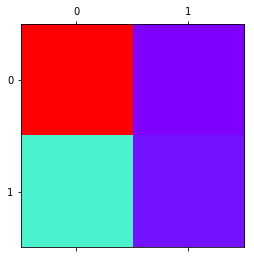

In [158]:
plt.matshow(conf, cmap='rainbow');
